# El corpus CIFAR-10/100

El corpus CIFAR-10/100 es un conjunto de datos de imágenes que se utiliza
comúnmente para el reconocimiento de imágenes. Se compone de 60.000 imágenes
divididas en 10 clases (CIFAR-10) o 100 clases (CIFAR-100), con 6.000 imágenes
por clase.

Las clases de CIFAR-10 son: avión, automóvil, pájaro, gato, venado,
perro, rana, caballo, barco y camión. Las clases de CIFAR-100 son subconjuntos
de las clases de CIFAR-10. Cada imagen es de 32x32 píxeles en color.


Importado de dependencias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

Carga de datos

In [2]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
images = np.concatenate([train_images, test_images])
labels = np.concatenate([train_labels, test_labels])
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

170498071/170498071 [==============================] - 19s 0us/step


Descipción

In [3]:
print("Tamaño de las etiquetas: ", labels.shape)
print("Etiquetas: ", np.unique(labels))
print("Tamaño del conjunto de datos: ", images.shape)
print("Tamaño de las imágenes: ", images.shape[1])

Tamaño de las etiquetas:  (60000, 1)
Etiquetas:  [0 1 2 3 4 5 6 7 8 9]
Tamaño del conjunto de datos:  (60000, 32, 32, 3)
Tamaño de las imágenes:  32


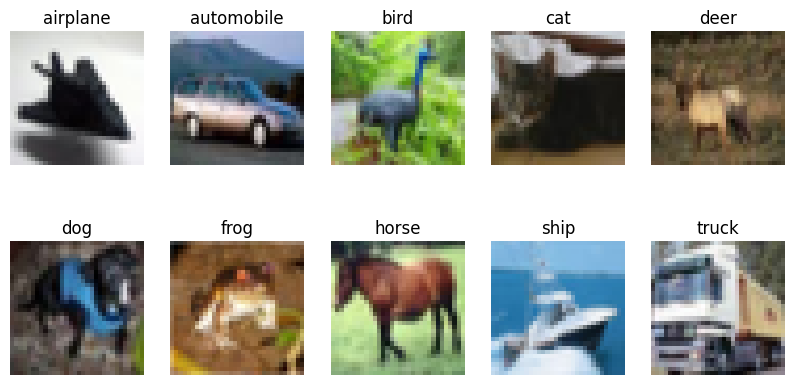

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
unique_labels = np.unique(labels)
for i, unique_label in enumerate(unique_labels):
    ax = axes[i//5, i%5]
    image_index = np.where(labels == unique_label)[0][0]
    ax.imshow(images[image_index])
    ax.set_title(class_names[int(unique_label)])
    ax.axis('off')

(array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8),
 [Text(6, 0, 'airplane'),
  Text(9, 0, 'automobile'),
  Text(4, 0, 'bird'),
  Text(1, 0, 'cat'),
  Text(2, 0, 'deer'),
  Text(7, 0, 'dog'),
  Text(8, 0, 'frog'),
  Text(3, 0, 'horse'),
  Text(5, 0, 'ship'),
  Text(0, 0, 'truck')])

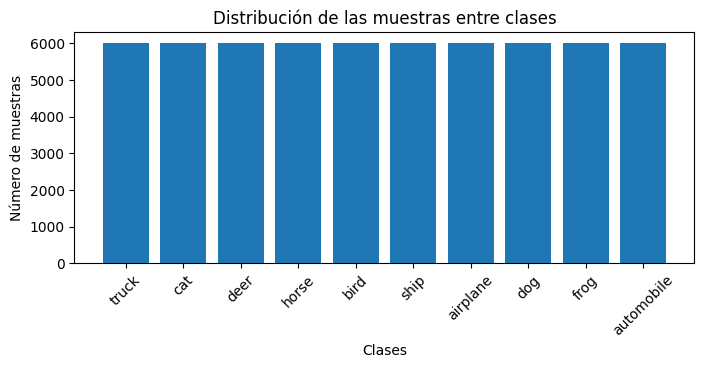

In [8]:
# Análisis de la distribución de las clases
label_count = Counter(labels.flatten())
plt.figure(figsize=(8, 3))
plt.bar(label_count.keys(), label_count.values(), tick_label=class_names)
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.title('Distribución de las muestras entre clases')
plt.xticks(rotation=45)

C:\Users\NachoDíez\AppData\Local\Temp\ipykernel_19592\3980115866.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(class_names[int(labels[image_index])] + " (" + str(sample_idx) + ")")


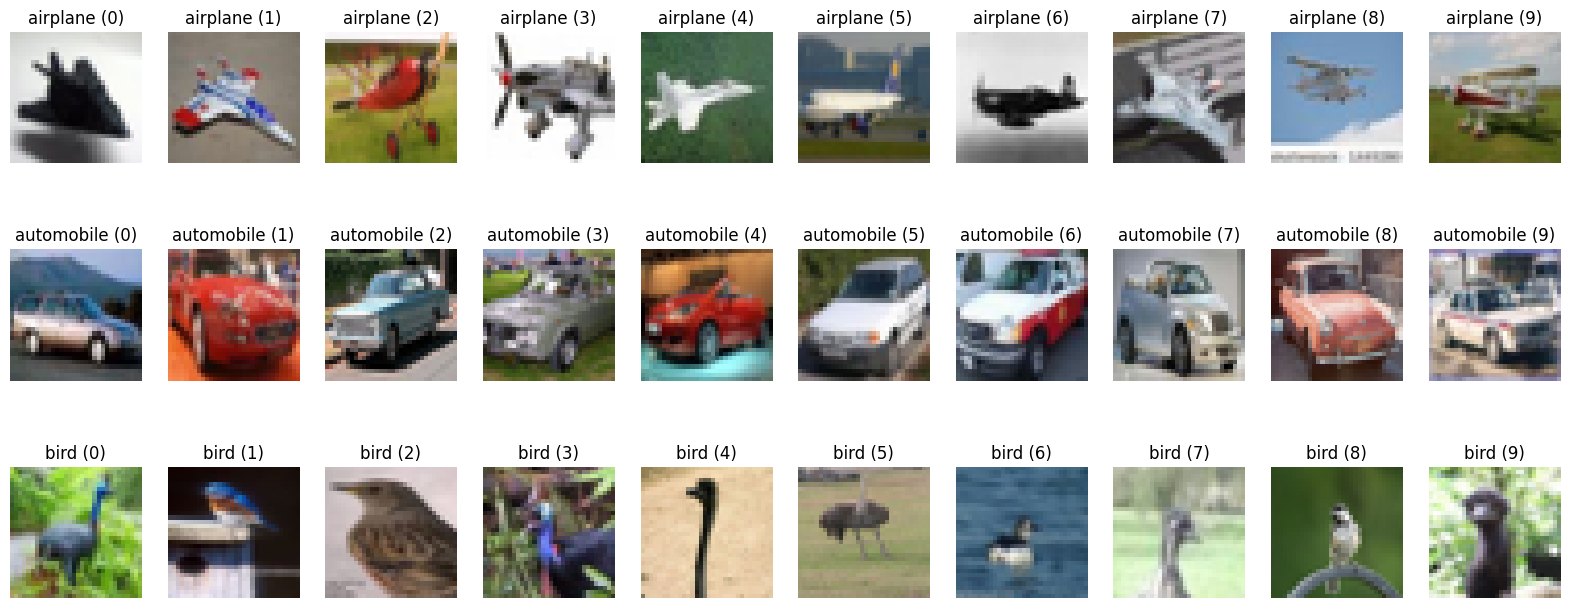

In [12]:
fig, axes = plt.subplots(3, 10, figsize=(20, 8))

for class_idx in range(3):  # Para las tres primeras clases
    class_samples = np.where(labels == class_idx)[0][:10]  # Obtener los índices de las 10 primeras muestras
    for sample_idx, image_index in enumerate(class_samples):
        ax = axes[class_idx, sample_idx]
        ax.imshow(images[image_index])
        ax.set_title(class_names[int(labels[image_index])] + " (" + str(sample_idx) + ")")
        ax.axis('off')